# **CIBA - PYTHON BÁSICO**

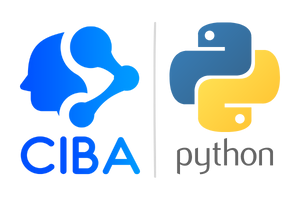


# SESIÓN 1 - TEMA 3

# Importación, exportación y manipulación de datos

Contenido:


*   Importación de datos desde Google Drive
*   Manipulación de datos
*   Exportación de datos en Google Drive

## Importación de datos desde Google Drive

In [ ]:
#Conexión con Drive a una carpeta compartida
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#La carpeta debe de tener un acceso directo en 'Mi Unidad'
%cd "/content/gdrive/My Drive/Materiales"

/content/gdrive/.shortcut-targets-by-id/1cyPC8JoME371zGOQ2T3Cvk5cCO5b2c7E/Materiales


In [ ]:
#Observamos los archivos dentro de la carpeta compartida
!ls

Cheatsheets  crime.csv	diamonds.gsheet  diamonds.xlsx


### Métodos de Importación

In [ ]:
#Librerías a usar
import pandas as pd


> Excel
```
pd.read_excel('file.xlsx',...)
```

> CSV
```
pd.read_csv('file.csv',...)
```

> TXT
```
pd.read_csv('file.txt',...)
```

> JSON
```
pd.read_json('file.json',...)
```

> Consultas SQL
```
pd.read_sql('SELECT * FROM table',con)
```

> Hojas de cálculo de Google
```
pd.DataFrame(worksheet.get_all_values())
```



Antes de importar datos hay que responder estas preguntas:
*   ¿En qué tipo de archivo se encuentran los datos?
*   Sea el caso de que necesite separadores, ¿Cuál se utiliza en el archivo?
*   ¿Cuál es la codificación del archivo?
*   ¿Tiene encabezado (nombre de las columnas)?
*   ¿Presenta alguna línea adicional a los datos?

*  **CSV**

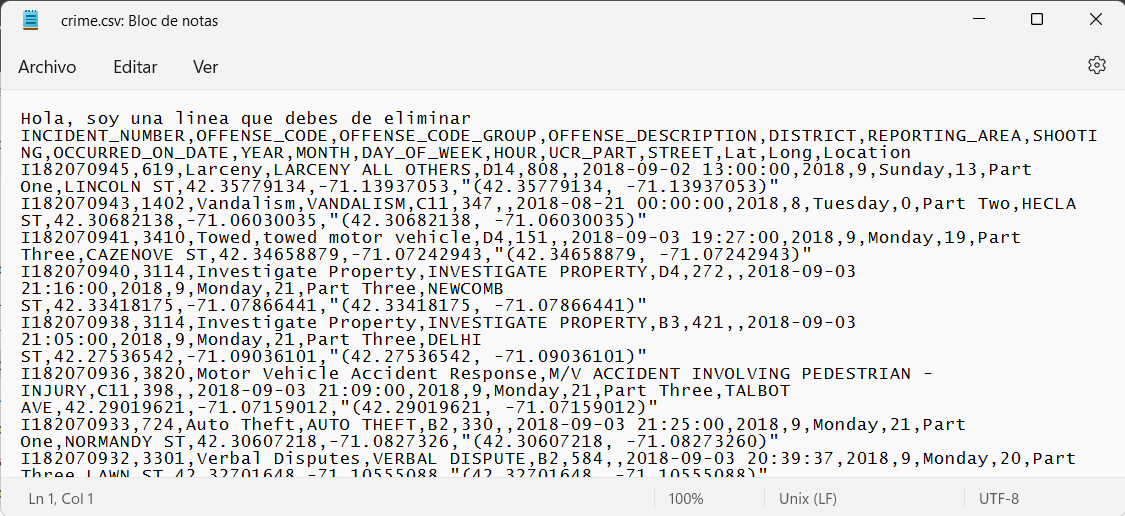

In [ ]:
#Importamos el archivo
crime = pd.read_csv('crime.csv',encoding = 'UTF-8',sep=',',skiprows=1)
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,towed motor vehicle,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
cols = ['INCIDENT_NUMBER','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','DISTRICT',
        'SHOOTING','OCCURRED_ON_DATE','STREET','Lat','Long']

In [ ]:
#Importar columnas específicas
crime = pd.read_csv('crime.csv',encoding = 'UTF-8',sep=',',skiprows=1, usecols=cols)
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,NaN,2018-09-02 13:00:00,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,VANDALISM,C11,NaN,2018-08-21 00:00:00,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,towed motor vehicle,D4,NaN,2018-09-03 19:27:00,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,NaN,2018-09-03 21:16:00,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,NaN,2018-09-03 21:05:00,DELHI ST,42.275365,-71.090361


*  **Excel**

In [ ]:
diamonds = pd.read_excel('diamonds.xlsx')

*  **Google Sheets**

In [ ]:
#Autorización para que Colab acceda a Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)



> **Abrir una hoja de cálculo**


```
#Por el nombre
gc.open('Google Sheets Name')

#Por la clave (se extrae de la URL)
gc.open_by_key('key')

#Por la URL
gc.open_by_url('https://docs.google.com/spreadsheet/...')
```



In [ ]:
workbook = gc.open('diamonds')

In [ ]:
# Obtenemos los títulos de las hojas
workbook.worksheets()

[<Worksheet 'Sheet1' id:165678732>]

In [ ]:
#Elegimos la hoja 1
worksheet = workbook.get_worksheet(0)

In [ ]:
#Otra forma:
worksheet = workbook.sheet1

In [ ]:
#Obtenemos los valores en forma de matriz
rows = worksheet.get_all_values()
#Lo convertimos a DataFrame 
diamonds = pd.DataFrame.from_records(rows[1:],columns=rows[0])

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,$326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,$326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,$327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,$334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,$335,4.34,4.35,2.75


## Manipulación de datos

### Formato de los datos

In [ ]:
print(crime.dtypes)
crime

INCIDENT_NUMBER         object
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
SHOOTING                object
OCCURRED_ON_DATE        object
STREET                  object
Lat                    float64
Long                   float64
dtype: object


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,NaN,2018-09-02 13:00:00,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,VANDALISM,C11,NaN,2018-08-21 00:00:00,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,towed motor vehicle,D4,NaN,2018-09-03 19:27:00,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,NaN,2018-09-03 21:16:00,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,NaN,2018-09-03 21:05:00,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,Warrant Arrests,WARRANT ARREST,D4,NaN,2016-06-05 17:25:00,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,NaN,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319070,I030217815-08,Warrant Arrests,WARRANT ARREST,E18,NaN,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319071,I010370257-00,Warrant Arrests,WARRANT ARREST,E13,NaN,2016-05-31 19:35:00,NEW WASHINGTON ST,42.302333,-71.111565


In [ ]:
print(diamonds.dtypes)
diamonds

carat      object
cut        object
color      object
clarity    object
depth      object
table      object
price      object
x          object
y          object
z          object
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,$326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,$326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,$327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,$334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,$335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57,$2757,5.75,5.76,3.5
53936,0.72,Good,D,SI1,63.1,55,$2757,5.69,5.75,3.61
53937,0.7,Very Good,D,SI1,62.8,60,$2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61,58,$2757,6.15,6.12,3.74


**Cambio de formato**

Con .astype()
```
df['column'].astype('int')
```

Con pd.to_numeric() o pd.to_datetime()
```
pd.to_numeric(df['column'],...)
pd.to_datetime(df['column'], ...)
```
Con .apply() para múltiples columnas
```
df[['a','b','c']] = df[['a','b','c']].apply(pd.to_numeric)
```

**CRIME DATA**

In [ ]:
#Cambio a datetime
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [ ]:
#Uniformizando los valores
crime['OFFENSE_DESCRIPTION'] = crime['OFFENSE_DESCRIPTION'].apply(lambda x: x.upper())

In [ ]:
crime['OFFENSE_DESCRIPTION'].unique()

array(['LARCENY ALL OTHERS', 'VANDALISM', 'TOWED MOTOR VEHICLE',
       'INVESTIGATE PROPERTY',
       'M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY', 'AUTO THEFT',
       'VERBAL DISPUTE', 'ROBBERY - STREET',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'THREATS TO DO BODILY HARM',
       'PROPERTY - LOST', 'SICK/INJURED/MEDICAL - PERSON',
       'DEMONSTRATIONS/RIOT', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'M/V ACCIDENT - OTHER', 'M/V ACCIDENT - PERSONAL INJURY',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY',
       'VIOL. OF RESTRAINING ORDER W NO ARREST',
       'VAL - VIOLATION OF AUTO LAW - OTHER',
       'VAL - OPERATING AFTER REV/SUSP.', 'HARASSMENT',
       'BALLISTICS EVIDENCE/FOUND', 'PROPERTY - FOUND',
       'LARCENY SHOPLIFTING', 'SERVICE TO OTHER PD INSIDE OF MA.',
       'FIRE REPORT/ALARM - FALSE',
       'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP', 'WARRANT ARREST',
       'DR

**DIAMOND DATA**

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,$326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,$326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,$327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,$334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,$335,4.34,4.35,2.75


In [ ]:
#Corte del diamante: 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal' (de peor a mejor)
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
diamonds['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [ ]:
#Color del diamante de D (mejor) a J (peor)
diamonds['color'] = pd.Categorical(diamonds['color'],categories=['J','I','H','G','F','E','D'],ordered=True)

In [ ]:
#Cambiamos el precio a entero
diamonds['price'] = diamonds['price'].apply(lambda x:x.replace('$','')).astype('int')
diamonds['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
#Otra forma
diamonds['price'] = diamonds['price'].apply(lambda x:x[1:]).astype('int')

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
diamonds[['carat','depth','table','price','x','y','z']] = diamonds[['carat','depth','table','price','x','y','z']].apply(pd.to_numeric)
diamonds[['carat','depth','table','price','x','y','z']].dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

### Datos Faltantes

In [ ]:
crime.isna()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,True,False,False,False,False
319069,False,False,False,False,True,False,False,False,False
319070,False,False,False,False,True,False,False,False,False
319071,False,False,False,False,True,False,False,False,False


In [ ]:
crime.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,True,False,False,False,False
319069,False,False,False,False,True,False,False,False,False
319070,False,False,False,False,True,False,False,False,False
319071,False,False,False,False,True,False,False,False,False


In [ ]:
#También existe un método para identificar valores no Nulos
crime.notnull()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,True,True,True,True,False,True,True,True,True
1,True,True,True,True,False,True,True,True,True
2,True,True,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True,True,True
4,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...
319068,True,True,True,True,False,True,True,True,True
319069,True,True,True,True,False,True,True,True,True
319070,True,True,True,True,False,True,True,True,True
319071,True,True,True,True,False,True,True,True,True


**IMPORTANTE**

Dichos métodos solo detectan los valores None y np.NaN. Otros valores retornarán False.

¿Que valores se podrían estar omitiendo?

* Los valores np.inf no se consideran valores NA.
    
    > En caso de querer considerarlos se tiene que establecer que: `pandas.options.mode.use_inf_as_na = True`

* Los caracteres designados para un dato faltante: No aplica, ND, etc. Además, las cadenas vacías '' tampoco son considerados como NA.


In [ ]:
#Sin datos faltantes
diamonds.isnull().sum()

,index,0
0,carat,0
1,cut,0
2,color,0
3,clarity,0
4,depth,0
5,table,0
6,price,0
7,x,0
8,y,0
9,z,0


In [ ]:
#Con datos faltantes
crime.isnull().sum()

,index,0
0,INCIDENT_NUMBER,0
1,OFFENSE_CODE_GROUP,0
2,OFFENSE_DESCRIPTION,0
3,DISTRICT,1765
4,SHOOTING,318054
5,OCCURRED_ON_DATE,0
6,STREET,10871
7,Lat,19999
8,Long,19999


**¿Que hacer con los datos faltantes?**

In [ ]:
#Reemplazarlos en el posible caso
crime['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [ ]:
crime['SHOOTING'][crime['SHOOTING'].isnull()] = 'N'

<ipython-input-37-f139dc47e5bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['SHOOTING'][crime['SHOOTING'].isnull()] = 'N'


In [ ]:
crime['SHOOTING'].fillna('N')

0         N
1         N
2         N
3         N
4         N
         ..
319068    N
319069    N
319070    N
319071    N
319072    N
Name: SHOOTING, Length: 319073, dtype: object

In [ ]:
crime['SHOOTING'].fillna('N',inplace=True)

In [ ]:
crime.loc[crime['SHOOTING'].isnull(),'SHOOTING'] = 'N'

In [ ]:
import numpy as np

In [ ]:
crime['SHOOTING'] = np.where(crime['SHOOTING'].isnull(),'N',crime['SHOOTING'])

In [ ]:
#Otras opciones
crime['SHOOTING'] = np.where(crime['SHOOTING'].isnull(),0,1)
crime['SHOOTING'] = np.where(crime['SHOOTING'].isnull(),False,True)

In [ ]:
#Verificando
crime['SHOOTING'].value_counts()

N    318054
Y      1019
Name: SHOOTING, dtype: int64

In [ ]:
#Eliminar (depende de la dimensión de la data)
print(crime.shape)
crime.isnull().sum()

(319073, 9)


INCIDENT_NUMBER            0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
SHOOTING                   0
OCCURRED_ON_DATE           0
STREET                 10871
Lat                    19999
Long                   19999
dtype: int64

In [ ]:
crime.dropna()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,N,2018-09-02 13:00:00,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,VANDALISM,C11,N,2018-08-21 00:00:00,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,TOWED MOTOR VEHICLE,D4,N,2018-09-03 19:27:00,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,N,2018-09-03 21:16:00,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,N,2018-09-03 21:05:00,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,Warrant Arrests,WARRANT ARREST,D4,N,2016-06-05 17:25:00,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319070,I030217815-08,Warrant Arrests,WARRANT ARREST,E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319071,I010370257-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-05-31 19:35:00,NEW WASHINGTON ST,42.302333,-71.111565


In [ ]:
crime.dropna(subset=['Lat', 'Long'])

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,N,2018-09-02 13:00:00,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,VANDALISM,C11,N,2018-08-21 00:00:00,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,TOWED MOTOR VEHICLE,D4,N,2018-09-03 19:27:00,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,N,2018-09-03 21:16:00,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,N,2018-09-03 21:05:00,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,Warrant Arrests,WARRANT ARREST,D4,N,2016-06-05 17:25:00,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319070,I030217815-08,Warrant Arrests,WARRANT ARREST,E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319071,I010370257-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-05-31 19:35:00,NEW WASHINGTON ST,42.302333,-71.111565


In [ ]:
crime.dropna(inplace=True)

In [ ]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182070945,Larceny,LARCENY ALL OTHERS,D14,N,2018-09-02 13:00:00,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,VANDALISM,C11,N,2018-08-21 00:00:00,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,TOWED MOTOR VEHICLE,D4,N,2018-09-03 19:27:00,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,INVESTIGATE PROPERTY,D4,N,2018-09-03 21:16:00,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,INVESTIGATE PROPERTY,B3,N,2018-09-03 21:05:00,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,Warrant Arrests,WARRANT ARREST,D4,N,2016-06-05 17:25:00,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319070,I030217815-08,Warrant Arrests,WARRANT ARREST,E18,N,2015-07-09 13:38:00,RIVER ST,42.255926,-71.123172
319071,I010370257-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-05-31 19:35:00,NEW WASHINGTON ST,42.302333,-71.111565


### Datos Duplicados

In [ ]:
#True si es una fila duplicada
crime.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319068    False
319069    False
319070    False
319071    False
319072    False
Length: 296663, dtype: bool

In [ ]:
crime.duplicated().sum()

23

In [ ]:
crime[crime.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
318745,I152030570-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-10-29 08:25:00,W WALNUT PARK,42.317207,-71.098799
318752,I152026775-00,Investigate Person,INVESTIGATE PERSON,C6,N,2015-10-19 16:04:00,ORTON-MAROTTA WAY,42.338573,-71.055755
318755,I152026488-00,Warrant Arrests,WARRANT ARREST,A1,N,2017-01-31 10:00:00,FRUIT ST,42.362403,-71.069547
318781,I152006153-00,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,N,2015-09-16 11:30:00,MASSACHUSETTS AVE,42.332531,-71.072130
318785,I152004688-00,Warrant Arrests,WARRANT ARREST,A1,N,2016-07-19 12:50:00,BOYLSTON ST,42.352418,-71.065255
318808,I142060752-00,Other,TRESPASSING,B2,N,2015-12-11 12:50:00,DUDLEY ST,42.328726,-71.083822
318810,I142060752-00,Warrant Arrests,WARRANT ARREST,B2,N,2015-12-11 12:50:00,DUDLEY ST,42.328726,-71.083822
318826,I142049917-00,Vandalism,VANDALISM,C11,N,2015-09-03 13:00:00,DORCHESTER AVE,42.285260,-71.064441
318866,I142025900-00,Warrant Arrests,WARRANT ARREST,E13,N,2015-12-01 18:00:00,AMORY ST,42.317713,-71.101805
318887,I142017108-00,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,A1,N,2015-06-16 15:55:00,FRUIT ST,42.362403,-71.069547


In [ ]:
crime[crime.duplicated(keep=False)]

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,STREET,Lat,Long
318742,I152030570-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-10-29 08:25:00,W WALNUT PARK,42.317207,-71.098799
318745,I152030570-00,Warrant Arrests,WARRANT ARREST,E13,N,2016-10-29 08:25:00,W WALNUT PARK,42.317207,-71.098799
318751,I152026775-00,Investigate Person,INVESTIGATE PERSON,C6,N,2015-10-19 16:04:00,ORTON-MAROTTA WAY,42.338573,-71.055755
318752,I152026775-00,Investigate Person,INVESTIGATE PERSON,C6,N,2015-10-19 16:04:00,ORTON-MAROTTA WAY,42.338573,-71.055755
318754,I152026488-00,Warrant Arrests,WARRANT ARREST,A1,N,2017-01-31 10:00:00,FRUIT ST,42.362403,-71.069547
318755,I152026488-00,Warrant Arrests,WARRANT ARREST,A1,N,2017-01-31 10:00:00,FRUIT ST,42.362403,-71.069547
318779,I152006153-00,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,N,2015-09-16 11:30:00,MASSACHUSETTS AVE,42.332531,-71.072130
318781,I152006153-00,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,N,2015-09-16 11:30:00,MASSACHUSETTS AVE,42.332531,-71.072130
318784,I152004688-00,Warrant Arrests,WARRANT ARREST,A1,N,2016-07-19 12:50:00,BOYLSTON ST,42.352418,-71.065255
318785,I152004688-00,Warrant Arrests,WARRANT ARREST,A1,N,2016-07-19 12:50:00,BOYLSTON ST,42.352418,-71.065255


In [ ]:
#Eliminamos los duplicados
crime.drop_duplicates(inplace=True)

In [ ]:
diamonds.duplicated().sum()
#Aunque si existen duplicados, no se eliminarán
#https://ggplot2.tidyverse.org/reference/diamonds.html

146

### Creación de nuevas columnas

**CRIME DATA**

*   Obtener el año, mes, día, día de la semana y hora a partir de la columna `OCCURRED_ON_DATE`
*   Otener las coordenadas a partir de las columnas `Lat` y `Long` con la siguiente forma: `(Lat, Long)`

In [ ]:
#Año
crime['YEAR'] = crime['OCCURRED_ON_DATE'].apply(lambda x: x.year)
crime['YEAR']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: YEAR, Length: 296640, dtype: int64

In [ ]:
#Mes
crime['MONTH'] = crime['OCCURRED_ON_DATE'].apply(lambda x: x.month)
crime['MONTH']

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: MONTH, Length: 296640, dtype: int64

In [ ]:
#Día
crime['DAY'] = crime['OCCURRED_ON_DATE'].apply(lambda x: x.day)
crime['DAY']

0          2
1         21
2          3
3          3
4          3
          ..
319068     5
319069     9
319070     9
319071    31
319072    22
Name: DAY, Length: 296640, dtype: int64

In [ ]:
#Día de la semana
crime['day_name'] = crime['OCCURRED_ON_DATE'].apply(lambda x: x.day_name())
crime['day_name']

0           Sunday
1          Tuesday
2           Monday
3           Monday
4           Monday
            ...   
319068      Sunday
319069    Thursday
319070    Thursday
319071     Tuesday
319072      Monday
Name: day_name, Length: 296640, dtype: object

**¿Y si quiero los días de la semana en Español?**

1. Crear un diccionario
2. Cambiar el idioma local de Google Colab de Inglés a Español

```
# Librerías
import locale
import os


#Configuración Inicial
locale.getlocale()
> ('en_US', 'UTF-8')

#Lista de configuraciones disponibles
!locale -a

#Instalación es_ES
!/usr/share/locales/install-language-pack es_ES
!dpkg-reconfigure locales

#Reiniciamos para poder elegir el nuevo idioma local
os.kill(os.getpid(), 9)

#Establecemos el español como idioma local
locale.setlocale(locale.LC_ALL,locale = "es_ES") 
> 'es_ES'

#Aplicamos el cambio para obtener los días en español
crime['OCCURRED_ON_DATE'].apply(lambda x: x.day_name(locale='es_ES'))
```

In [ ]:
dia_semana = {
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miércoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo',
}

In [ ]:
#Día de la semana en Español
crime['day_name'] = crime['OCCURRED_ON_DATE'].apply(lambda x: dia_semana[x.day_name()])
crime['day_name']

0         Domingo
1          Martes
2           Lunes
3           Lunes
4           Lunes
           ...   
319068    Domingo
319069     Jueves
319070     Jueves
319071     Martes
319072      Lunes
Name: day_name, Length: 296640, dtype: object

In [ ]:
crime['HOUR'] = crime['OCCURRED_ON_DATE'].apply(lambda x:x.hour)
crime['HOUR']

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: HOUR, Length: 296640, dtype: int64

In [ ]:
crime['COORDENADAS'] = '(' + crime['Lat'].astype('str') + ', ' + crime['Long'].astype('str') + ')'
crime['COORDENADAS']

0         (42.35779134, -71.13937053)
1         (42.30682138, -71.06030035)
2         (42.34658879, -71.07242943)
3         (42.33418175, -71.07866441)
4         (42.27536542, -71.09036101)
                     ...             
319068    (42.33695098, -71.08574813)
319069    (42.25592648, -71.12317207)
319070    (42.25592648, -71.12317207)
319071    (42.30233307, -71.11156487)
319072    (42.33383935, -71.08029038)
Name: COORDENADAS, Length: 296640, dtype: object

In [ ]:
'(' + crime[['Lat','Long']].astype(str).apply(', '.join, axis=1) + ')'

0         (42.35779134, -71.13937053)
1         (42.30682138, -71.06030035)
2         (42.34658879, -71.07242943)
3         (42.33418175, -71.07866441)
4         (42.27536542, -71.09036101)
                     ...             
319068    (42.33695098, -71.08574813)
319069    (42.25592648, -71.12317207)
319070    (42.25592648, -71.12317207)
319071    (42.30233307, -71.11156487)
319072    (42.33383935, -71.08029038)
Length: 296663, dtype: object

### Agrupación de datos

**CRIME DATA**

*  Número de Incidentes por mes
*  Número de Incidentes por mes y distrito (tabla dinámica)

In [ ]:
crime.groupby('MONTH')

In [ ]:
crime.groupby('MONTH')['INCIDENT_NUMBER']

In [ ]:
tabla1 = crime.groupby('MONTH')['INCIDENT_NUMBER'].count()
tabla1

MONTH
1     22190
2     20086
3     22275
4     22424
5     24229
6     28498
7     32052
8     32211
9     24665
10    23879
11    22099
12    22032
Name: INCIDENT_NUMBER, dtype: int64

In [ ]:
tabla2 = crime.groupby('MONTH')['INCIDENT_NUMBER'].count().reset_index()
tabla2

,MONTH,INCIDENT_NUMBER
0,1,22190
1,2,20086
2,3,22275
3,4,22424
4,5,24229
5,6,28498
6,7,32052
7,8,32211
8,9,24665
9,10,23879


In [ ]:
type(tabla1), type(tabla2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

Uno es una serie y el otro un DataFrame ¿Hay diferencia?

In [ ]:
tabla1.loc[1]

22190

In [ ]:
tabla2.loc[1]

MONTH                  2
INCIDENT_NUMBER    20086
Name: 1, dtype: int64

In [ ]:
tabla1.iloc[[0]]

MONTH
1    22190
Name: INCIDENT_NUMBER, dtype: int64

In [ ]:
tabla2.iloc[[0]]

,MONTH,INCIDENT_NUMBER
0,1,22190


In [ ]:
tabla1['MONTH']

KeyError: ignored

In [ ]:
tabla1.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='MONTH')

In [ ]:
tabla2['MONTH']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: MONTH, dtype: int64

In [ ]:
#Lista de resultados
crime_res = [None]*2

In [ ]:
crime_res[0] = crime.groupby('MONTH')['INCIDENT_NUMBER'].count().reset_index()
crime_res[0]

,MONTH,INCIDENT_NUMBER
0,1,22190
1,2,20086
2,3,22275
3,4,22424
4,5,24229
5,6,28498
6,7,32052
7,8,32211
8,9,24665
9,10,23879


In [ ]:
crime_res[1] = pd.pivot_table(crime, values='INCIDENT_NUMBER', index=['DISTRICT'],
                    columns=['MONTH'], aggfunc=lambda x: x.count())
crime_res[1]

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DISTRICT,,,,,,,,,,,,
A1,2382,2096,2266,2346,2534,2891,3575,3694,2760,2757,2457,2315
A15,471,416,476,440,525,654,657,660,505,441,474,450
A7,982,887,941,1047,1059,1280,1334,1414,1074,1073,963,961
B2,3473,3036,3612,3553,3711,4477,4919,4890,3842,3693,3406,3422
B3,2579,2247,2513,2590,2810,3236,3590,3734,2666,2688,2533,2496
C11,3115,2771,3042,3077,3457,3818,4459,4318,3378,3188,3004,3093
C6,1626,1445,1737,1699,1647,2083,2373,2391,1785,1808,1476,1608
D14,1362,1295,1372,1333,1620,1826,2011,2062,1746,1646,1422,1410
D4,2691,2602,2831,2846,3088,3721,4235,4145,3217,3079,2907,2871


**DIAMONDS DATA**


*   Características promedio de los diamantes según cortes.
*   Precio según corte y color: Mínimo, Máximo, Promedio
*   Peso mínimo y máximo del diamante en quilates `carat` y precio mínimo y máximo del diamante según corte y color
*  Diamantes cuyo corte tenga en promedio 1 quilate.

In [ ]:
#Lista de resultados
diamonds_res = [None]*3

In [ ]:
diamonds_res[0] = diamonds.groupby("cut").mean()
diamonds_res[0]

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448


In [ ]:
diamonds_res[1] = diamonds.groupby(["cut","color"])["price"].aggregate(["min",np.mean,max])
diamonds_res[1]

min         mean    max
cut       color                         
Fair      J      416  4975.655462  18531
          I      735  4685.445714  18242
          H      659  5135.683168  18565
          G      369  4239.254777  18574
          F      496  3827.003205  17995
          E      337  3682.312500  15584
          D      536  4291.061350  16386
Good      J      335  4574.172638  18325
          I      351  5078.532567  18707
          H      368  4276.254986  18640
          G      394  4123.482204  18788
          F      357  3495.750275  18686
          E      327  3423.644159  18236
          D      361  3405.382175  18468
Very Good J      336  5103.513274  18430
          I      336  5255.879568  18500
          H      337  4535.390351  18803
          G      354  3872.753806  18818
          F      357  3778.820240  18777
          E      352  3214.652083  18731
          D      357  3470.467284  18542
Premium   J      363  6294.591584  18710
          I      334  5946.180672  18823
          H      368  5216.706780  18795
          G      382  4500.742134  18741
          F      342  4324.890176  18791
          E      326  3538.914420  18477
          D      367  3631.292576  18575
Ideal     J      340  4918.186384  18508
          I      348  4451.970377  18779
          H      357  3889.334831  18760
          G      361  3720.706388  18806
          F      408  3374.939362  18780
          E      326  2597.550090  18729
          D      367  2629.094566  18693

In [ ]:
dict_agg = {"carat": [min,max], "price": [min,max]}
diamonds.groupby(["cut","color"]).aggregate(dict_agg)

carat       price       
                  min   max   min    max
cut       color                         
Fair      J      0.30  5.01   416  18531
          I      0.41  3.02   735  18242
          H      0.33  4.13   659  18565
          G      0.23  2.60   369  18574
          F      0.25  2.58   496  17995
          E      0.22  2.04   337  15584
          D      0.25  3.40   536  16386
Good      J      0.28  3.00   335  18325
          I      0.30  3.01   351  18707
          H      0.25  3.01   368  18640
          G      0.23  2.80   394  18788
          F      0.23  2.67   357  18686
          E      0.23  3.00   327  18236
          D      0.23  2.04   361  18468
Very Good J      0.24  2.74   336  18430
          I      0.24  4.00   336  18500
          H      0.23  3.00   337  18803
          G      0.23  2.52   354  18818
          F      0.23  2.48   357  18777
          E      0.20  2.51   352  18731
          D      0.23  2.58   357  18542
Premium   J      0.30  4.01   363  18710
          I      0.23  4.01   334  18823
          H      0.23  3.24   368  18795
          G      0.23  3.01   382  18741
          F      0.20  3.01   342  18791
          E      0.20  3.05   326  18477
          D      0.20  2.57   367  18575
Ideal     J      0.23  3.01   340  18508
          I      0.23  3.22   348  18779
          H      0.23  3.50   357  18760
          G      0.23  2.54   361  18806
          F      0.23  2.45   408  18780
          E      0.20  2.28   326  18729
          D      0.20  2.75   367  18693

### Filtros

In [ ]:
diamonds_res[2] = diamonds.groupby("cut").filter(lambda x: x['carat'].mean() > 1)
diamonds_res[2] 

,carat,cut,color,clarity,depth,table,price,x,y,z
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
123,0.70,Fair,F,VS2,64.5,57.0,2762,5.57,5.53,3.58
124,0.70,Fair,F,VS2,65.3,55.0,2762,5.63,5.58,3.66
...,...,...,...,...,...,...,...,...,...,...
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34
53800,0.90,Fair,I,VS1,68.7,62.0,2732,5.83,5.79,3.99
53863,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13
53879,1.04,Fair,G,SI2,65.2,57.0,2745,6.25,6.23,4.07


## Exportación de datos en Google Drive

No se puede exportar en carpetas que no son propias. Si te encuentras trabajando en una carpeta compartida el archivo se va a descargar en Mi Unidad por defecto

In [ ]:
#Conexión con Drive a una carpeta propia
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/UNIVERSIDAD/CIBA/Archivos Exportados"

/content/drive/My Drive/UNIVERSIDAD/CIBA/Archivos Exportados


In [ ]:
#Observamos los archivos dentro de la carpeta 
!ls

### Métodos de Exportación


> Excel
```
df.to_excel('file_name.xlsx',...)
```

> CSV
```
df.to_csv('file_name.csv',...)
```

> JSON
```
df.to_json('file_name.json',...)
```

> Consultas SQL
```
df.to_sql('table_name', con=engine,...)
```


*  **Excel**

In [ ]:
#Exportamos el 1° resultado de crime
crime_res[0].to_excel('crimenes_mensuales.xlsx')

In [ ]:
#Eliminamos el índice
crime_res[0].to_excel('crimenes_mensuales.xlsx',index=False)

*  **CSV**

In [ ]:
#Exportamos el 2° resultado de crime
crime_res[1].to_csv('crimenes_por_distrito.csv',encoding='UTF-8',sep=';',decimal='.')

*  **Google Sheets**

In [ ]:
#Creamos una hoja de cálculo (por defecto, crea una hoja)
new_workbook = gc.create('Descripción diamantes')

In [ ]:
#Si se desea se crea una nueva hoja
new_workbook.add_worksheet('Hoja 2',
                           rows=diamonds_res[1].shape[0],
                           cols=diamonds_res[1].shape[1])
new_workbook.add_worksheet('Hoja 3',
                           rows=diamonds_res[2].shape[0],
                           cols=diamonds_res[2].shape[1])

<Worksheet 'Hoja 3' id:1045188769>

In [ ]:
new_workbook.worksheets()

[<Worksheet 'Hoja 1' id:0>,
 <Worksheet 'Hoja 2' id:1186870023>,
 <Worksheet 'Hoja 3' id:1045188769>]

In [ ]:
for i in range(len(new_workbook.worksheets())):
  print(f'Insertando Hoja {i+1}')
  worksheet = new_workbook.get_worksheet(i)
  worksheet.update([diamonds_res[i].columns.values.tolist()] + diamonds_res[i].values.tolist())

Insertando Hoja 1
Insertando Hoja 2
Insertando Hoja 3


In [ ]:
#Otra forma
new_workbook.values_update(
  'Hoja 1!A1', #
  params={
      'valueInputOption': 'USER_ENTERED'
  },
  body={
      'values': df.values.tolist()
  }
)

{'spreadsheetId': '1r3TkkHMl2T_Olx8WztqjmWDCGLVFf9Z3tKP3AFiC3g8',
 'updatedRange': "'Hoja 1'!A1:B2",
 'updatedRows': 2,
 'updatedColumns': 2,
 'updatedCells': 4}